## HireArt Analytics Challenge

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,date
from datetime import timedelta

### Step1 : Import the dataset  and Get Year and Month fields from Date

In [66]:
df = pd.read_excel('HireArt - Data Analyst Exercise 10.12.17.xlsx', sheetname='Sheet1')

In [67]:
df.shape

(1001, 3)

In [68]:
df.columns

Index(['Account manager', 'Client Name', 'Date of Contact'], dtype='object')

In [69]:
df.dtypes

Account manager            object
Client Name                object
Date of Contact    datetime64[ns]
dtype: object

In [70]:
df['Year']=df['Date of Contact'].dt.year
df['Month']=df['Date of Contact'].dt.month
df['MonthName']=df['Date of Contact'].dt.month_name()

In [71]:
df=df[['Client Name','Year','Month','MonthName']]

In [72]:
df.shape

(1001, 4)

In [73]:
df.head(5)

,Client Name,Year,Month,MonthName
0,"Wyman, Farrell and Haag",2015,10,October
1,"Veum, McClure and Schuster",2013,12,December
2,"Veum, McClure and Schuster",2013,12,December
3,Armstrong Group,2013,11,November
4,"Lueilwitz, Moore and Hahn",2013,12,December


### Step 2: Drop duplicates

In [74]:
df.drop_duplicates(inplace=True)

In [75]:
df.shape

(724, 4)

In [76]:
print("The number of unique clients:",len(df['Client Name'].unique()))

The number of unique clients: 35


### Step 3: Analysis By Year and Month

In [91]:
month_df = pd.DataFrame({'Client_Count': df.groupby(['MonthName','Month'])['Client Name'].count()}).reset_index().sort_values('Month')

In [93]:
year_df =pd.DataFrame({'Client_Count': df.groupby(['Year','MonthName','Month'])['Client Name'].count()}).reset_index().sort_values(['Year','Month'])

In [103]:
month_df['Client_Distribution'] = (month_df['Client_Count']/month_df.Client_Count.sum())*100

#### Client Distribution by Months - Overall

In [108]:
month_df

,MonthName,Month,Client_Count,Client_Distribution
4,January,1,50,6.906077
3,February,2,53,7.320442
7,March,3,48,6.629834
0,April,4,43,5.939227
8,May,5,55,7.596685
6,June,6,61,8.425414
5,July,7,52,7.182320
1,August,8,59,8.149171
11,September,9,81,11.187845
10,October,10,112,15.469613


_Overall the client reach is highest in the month of October with a reach of 112 across the five years(2013 included)_

In [112]:
year_df

,Year,MonthName,Month,Client_Count
2,2013,October,10,31
1,2013,November,11,12
0,2013,December,12,15
7,2014,January,1,9
6,2014,February,2,11
10,2014,March,3,11
3,2014,April,4,11
11,2014,May,5,12
9,2014,June,6,19
8,2014,July,7,15


#### Average Client Reach By Month

In [110]:
avg_df = pd.DataFrame({'Avg_Reach':year_df.groupby(['MonthName','Month'])['Client_Count'].mean()}).sort_values('Month')

In [129]:
avg_df.reset_index(inplace=True)

In [131]:
avg_df.set_index('MonthName',inplace=True)

_The average client reach by month is highest for October with a value of 28_

### Step 4: Capturing the client reach trend using visualization

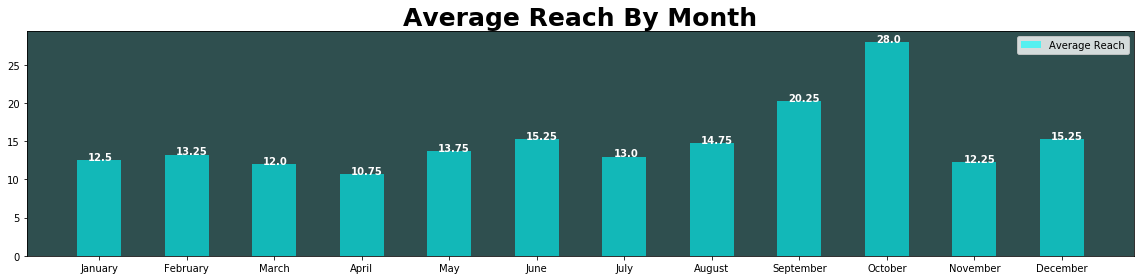

In [132]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111,facecolor='darkslategray')
index = avg_df.index.unique()
y_pos = np.arange(len(index))
bar_width=0.5
opacity=0.6
plt.bar(y_pos,avg_df.Avg_Reach,bar_width,alpha=opacity,color='cyan',label='Average Reach')
for i,j in zip(y_pos,avg_df.Avg_Reach):
    ax.annotate(str(j),xy=(i-0.125,j),color='white',weight='bold')
plt.title("Average Reach By Month",fontsize=25,weight='bold')
plt.xticks(y_pos,index)
plt.tight_layout()
plt.legend()
plt.show()

## Conclusion

Based on the historical trend, the highest average reach is in October on average, so they can target this month to schedule a product upgrade announcement. 